<a href="https://colab.research.google.com/github/sonsiho/PythonForEngineer/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import thư viện

In [1]:
# importing all necessary libraries
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from tqdm.notebook import tqdm as tqdm

import plotly.graph_objs as go #visualization library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorrelation test
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller #stationarity test
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from datetime import datetime, timedelta
import statsmodels.api as sm
import gc
from pylab import rcParams
import random
import os
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import gc
import lightgbm as lgb
import time
import numpy as np
import pandas as pd
import os
import time
import matplotlib.dates as mdates
import gc
import lightgbm as lgb
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
import multiprocessing as mp
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Load dữ liệu

In [2]:
# import Pandas hổ trợ xử lý đọc file và truy xuất dữ liệu
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Đọc dữ liệu từ bộ data input:
# calendar_df.csv : Chứa thông tin về ngày sản phẩm được bán và cũng chứa thông tin về các ngày lễ và các dịp đặc biệt.
# train_sales_df: Chứa dữ liệu lịch sử bán hàng mỗi ngày cho mỗi sản phẩm của từng cửa hàng và bộ phận bán hàng trong 1900 ngày
# sell_prices_df : Dữ liệu giá bán của các mặt hàng được bán trên mỗi cửa hàng theo từng ngày

# Tập dữ liệu đã được resized
sell_prices  = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sell_prices.csv')
train_sales = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv')
df_val   = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv')
calender  = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/calendar.csv')


# Tập dữ liệu full
# sell_prices_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/sell_prices.csv')
# train_sales_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv')
# calendar_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/calendar.csv')

# file mẫu (file kết quả sau dự báo) để nộp kết quả dự báo doanh số bán hàng 28 ngày tới.
# submission_file = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sample_submission.csv')

# sales_train_evaluation = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv')



## Kiểm tra lại dữ liệu

In [3]:
train_sales.info()
calender.info()
sell_prices.info()
train_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 29.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
<clas

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


# Quan sát dữ liệu

In [4]:
calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


# Thăm dò dữ liệu

## Check null dữ liệu

In [6]:
train_sales.isnull().sum().sort_values(ascending = False)

id        0
d_1273    0
d_1301    0
d_1300    0
d_1299    0
         ..
d_639     0
d_638     0
d_637     0
d_636     0
d_1941    0
Length: 1947, dtype: int64

In [7]:
sell_prices.isnull().sum().sort_values(ascending = False)

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [8]:
calender.isnull().sum().sort_values(ascending = False)

event_name_2    1964
event_type_2    1964
event_name_1    1807
event_type_1    1807
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [9]:
holiday = ['NewYear', 'OrthodoxChristmas', 'MartinLutherKingDay', 'SuperBowl', 'PresidentsDay', 'StPatricksDay', 'Easter', 'Cinco De Mayo', 'IndependenceDay', 'EidAlAdha', 'Thanksgiving', 'Christmas']
weekend = ['Saturday', 'Sunday']

def is_holiday(x):
    if x in holiday:
        return 1
    else:
        return 0

def is_weekend(x):
    if x in weekend:
        return 1
    else:
        return 0

In [10]:
calender['is_holiday_1'] = calender['event_name_1'].apply(is_holiday)
calender['is_holiday_2'] = calender['event_name_2'].apply(is_holiday)
calender['is_holiday'] = calender[['is_holiday_1','is_holiday_2']].max(axis=1)
calender['is_weekend'] = calender['weekday'].apply(is_weekend)

In [11]:
calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,is_holiday_1,is_holiday_2,is_holiday,is_weekend
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0


In [12]:
calender = calender.drop(['weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'], axis='columns')

In [13]:
sell_prices.describe()

,wm_yr_wk,sell_price
count,302573.000000,302573.000000
mean,11382.613059,5.347679
std,148.102251,4.138787
min,11101.000000,0.010000
25%,11246.000000,2.640000
50%,11410.000000,4.420000
75%,11517.000000,6.970000
max,11621.000000,30.980000


In [14]:
del_col = []
for x in range(1851):
    del_col.append('d_' + str(x+1))

In [15]:
train_sales =train_sales.drop(del_col, axis='columns')

## Đánh giá và tính toán giá cả 

In [16]:
train_sales = train_sales.melt(['id','item_id','dept_id','cat_id','store_id','state_id'], var_name='d', value_name='qty')
print(train_sales.shape)
train_sales.head()

(179910, 8)


,id,item_id,dept_id,cat_id,store_id,state_id,d,qty
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,1
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0


In [17]:
train_sales = pd.merge(train_sales, calender, how='left', on='d')
train_sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,qty,date,wm_yr_wk,snap_CA,snap_TX,snap_WI,is_holiday_1,is_holiday_2,is_holiday,is_weekend
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,1,2016-02-23,11604,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0


In [18]:
train_sales = pd.merge(train_sales, sell_prices, how='left', on=['item_id', 'wm_yr_wk', 'store_id'])
train_sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,qty,date,wm_yr_wk,snap_CA,snap_TX,snap_WI,is_holiday_1,is_holiday_2,is_holiday,is_weekend,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,8.26
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,3.97
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,2.97
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,1,2016-02-23,11604,0,0,0,0,0,0,0,4.64
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,2.88


In [19]:
#print shape of the dataset 
train_sales.shape

(179910, 18)

In [20]:
train_sales.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d,qty,date,wm_yr_wk,snap_CA,snap_TX,snap_WI,is_holiday_1,is_holiday_2,is_holiday,is_weekend,sell_price
179905,FOODS_2_168_CA_1_evaluation,FOODS_2_168,FOODS_2,FOODS,CA_1,CA,d_1941,0,2016-05-22,11617,0,0,0,0,0,0,1,NaN
179906,FOODS_2_169_CA_1_evaluation,FOODS_2_169,FOODS_2,FOODS,CA_1,CA,d_1941,1,2016-05-22,11617,0,0,0,0,0,0,1,NaN
179907,FOODS_2_170_CA_1_evaluation,FOODS_2_170,FOODS_2,FOODS,CA_1,CA,d_1941,1,2016-05-22,11617,0,0,0,0,0,0,1,NaN
179908,FOODS_2_171_CA_1_evaluation,FOODS_2_171,FOODS_2,FOODS,CA_1,CA,d_1941,2,2016-05-22,11617,0,0,0,0,0,0,1,NaN
179909,FOODS_2_172_CA_1_evaluation,FOODS_2_172,FOODS_2,FOODS,CA_1,CA,d_1941,3,2016-05-22,11617,0,0,0,0,0,0,1,NaN


In [21]:
train_sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,qty,date,wm_yr_wk,snap_CA,snap_TX,snap_WI,is_holiday_1,is_holiday_2,is_holiday,is_weekend,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,8.26
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,3.97
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,2.97
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,1,2016-02-23,11604,0,0,0,0,0,0,0,4.64
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,2.88


In [22]:
train_sales_test = train_sales.query('d == "d_1852"')
train_sales_test.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,qty,date,wm_yr_wk,snap_CA,snap_TX,snap_WI,is_holiday_1,is_holiday_2,is_holiday,is_weekend,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,8.26
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,3.97
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,2.97
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,1,2016-02-23,11604,0,0,0,0,0,0,0,4.64
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1852,0,2016-02-23,11604,0,0,0,0,0,0,0,2.88


In [23]:
train_sales_test = train_sales_test[['id', 'store_id', 'item_id', 'dept_id', 'cat_id', 'state_id', 'd', 'qty', 'sell_price']]

In [24]:
train_sales_test.head()

,id,store_id,item_id,dept_id,cat_id,state_id,d,qty,sell_price
0,HOBBIES_1_001_CA_1_evaluation,CA_1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,d_1852,0,8.26
1,HOBBIES_1_002_CA_1_evaluation,CA_1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA,d_1852,0,3.97
2,HOBBIES_1_003_CA_1_evaluation,CA_1,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA,d_1852,0,2.97
3,HOBBIES_1_004_CA_1_evaluation,CA_1,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA,d_1852,1,4.64
4,HOBBIES_1_005_CA_1_evaluation,CA_1,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA,d_1852,0,2.88


In [ ]:
train_sales_test.shape

(1999, 9)

In [25]:
train_sales_test['qty'] =train_sales_test['d'].apply(lambda x: int(x.replace(x, '0')))

In [26]:
tmp_df =train_sales_test

In [27]:
for x in range(28):
    train_sales_test =train_sales_test.append(tmp_df)

In [28]:
train_sales_test =train_sales_test.reset_index(drop=True)

In [29]:
train_sales_test.tail()

,id,store_id,item_id,dept_id,cat_id,state_id,d,qty,sell_price
57966,FOODS_2_168_CA_1_evaluation,CA_1,FOODS_2_168,FOODS_2,FOODS,CA,d_1852,0,NaN
57967,FOODS_2_169_CA_1_evaluation,CA_1,FOODS_2_169,FOODS_2,FOODS,CA,d_1852,0,NaN
57968,FOODS_2_170_CA_1_evaluation,CA_1,FOODS_2_170,FOODS_2,FOODS,CA,d_1852,0,NaN
57969,FOODS_2_171_CA_1_evaluation,CA_1,FOODS_2_171,FOODS_2,FOODS,CA,d_1852,0,NaN
57970,FOODS_2_172_CA_1_evaluation,CA_1,FOODS_2_172,FOODS_2,FOODS,CA,d_1852,0,NaN


In [30]:
lst_d = []
i = 0
lst_index = train_sales_test.index
for x in lst_index:
    lst_d.append('d_' + str(((lst_index[i]) // 30490) + 1942))
    i = i + 1

lst_d

['d_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',
 'd_1942',

In [31]:
train_sales_test['d'] = lst_d
train_sales_test.head()

,id,store_id,item_id,dept_id,cat_id,state_id,d,qty,sell_price
0,HOBBIES_1_001_CA_1_evaluation,CA_1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,d_1942,0,8.26
1,HOBBIES_1_002_CA_1_evaluation,CA_1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA,d_1942,0,3.97
2,HOBBIES_1_003_CA_1_evaluation,CA_1,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA,d_1942,0,2.97
3,HOBBIES_1_004_CA_1_evaluation,CA_1,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA,d_1942,0,4.64
4,HOBBIES_1_005_CA_1_evaluation,CA_1,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA,d_1942,0,2.88


In [32]:
# print last 5 rows in dataset
train_sales_test.tail()

,id,store_id,item_id,dept_id,cat_id,state_id,d,qty,sell_price
57966,FOODS_2_168_CA_1_evaluation,CA_1,FOODS_2_168,FOODS_2,FOODS,CA,d_1943,0,NaN
57967,FOODS_2_169_CA_1_evaluation,CA_1,FOODS_2_169,FOODS_2,FOODS,CA,d_1943,0,NaN
57968,FOODS_2_170_CA_1_evaluation,CA_1,FOODS_2_170,FOODS_2,FOODS,CA,d_1943,0,NaN
57969,FOODS_2_171_CA_1_evaluation,CA_1,FOODS_2_171,FOODS_2,FOODS,CA,d_1943,0,NaN
57970,FOODS_2_172_CA_1_evaluation,CA_1,FOODS_2_172,FOODS_2,FOODS,CA,d_1943,0,NaN


In [33]:
train_sales_test.shape

(57971, 9)

In [34]:
train_sales_test = pd.merge(train_sales_test,calender, how='left', on='d')

In [35]:
train_sales_test = pd.merge(train_sales_test, sell_prices ,how='left', on=['item_id', 'wm_yr_wk', 'store_id'])
train_sales_test.head()

,id,store_id,item_id,dept_id,cat_id,state_id,d,qty,sell_price_x,date,wm_yr_wk,snap_CA,snap_TX,snap_WI,is_holiday_1,is_holiday_2,is_holiday,is_weekend,sell_price_y
0,HOBBIES_1_001_CA_1_evaluation,CA_1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,d_1942,0,8.26,2016-05-23,11617,0,0,0,0,0,0,0,8.38
1,HOBBIES_1_002_CA_1_evaluation,CA_1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA,d_1942,0,3.97,2016-05-23,11617,0,0,0,0,0,0,0,3.97
2,HOBBIES_1_003_CA_1_evaluation,CA_1,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA,d_1942,0,2.97,2016-05-23,11617,0,0,0,0,0,0,0,2.97
3,HOBBIES_1_004_CA_1_evaluation,CA_1,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA,d_1942,0,4.64,2016-05-23,11617,0,0,0,0,0,0,0,4.64
4,HOBBIES_1_005_CA_1_evaluation,CA_1,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA,d_1942,0,2.88,2016-05-23,11617,0,0,0,0,0,0,0,2.88


# Xử lý và phân tích dữ liệu

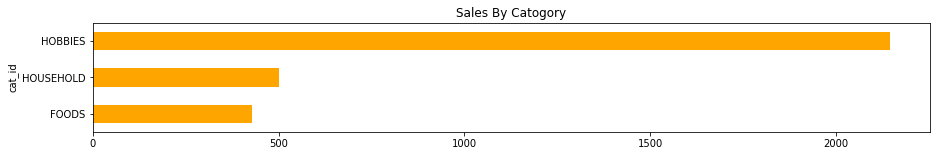

In [36]:
df_val.groupby('cat_id').count()['id'].sort_values().plot(kind='barh',figsize=(15,2), title='Sales By Catogory',width=0.5,color='orange')
plt.show()

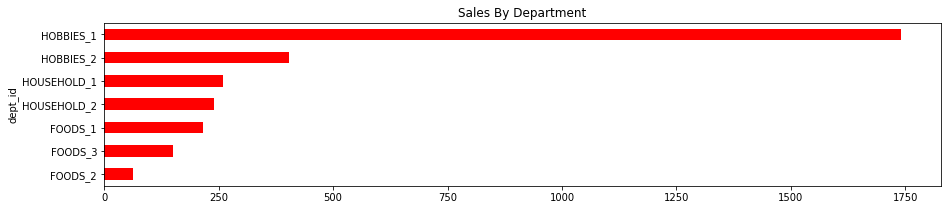

In [37]:
#Sales By Department
df_val.groupby('dept_id').count()['id'].sort_values().plot(kind='barh',figsize=(15,3), title='Sales By Department',color='red')
plt.show()

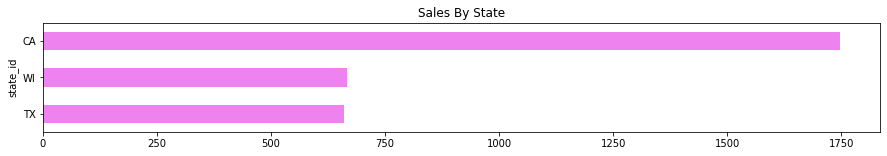

In [38]:
#Sales By State
df_val.groupby('state_id').count()['id'].sort_values().plot(kind='barh',figsize=(15,2), title='Sales By State',color='violet')
plt.show()

Text(0.5, 1.0, 'Count of classes')

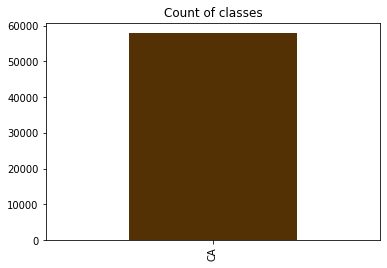

In [39]:
pd.value_counts(train_sales_test['state_id']).plot(kind = 'bar',cmap = 'BrBG')
plt.rcParams['axes.facecolor'] = 'orange'
plt.title("Count of classes")

Text(0.5, 1.0, 'Count of classes')

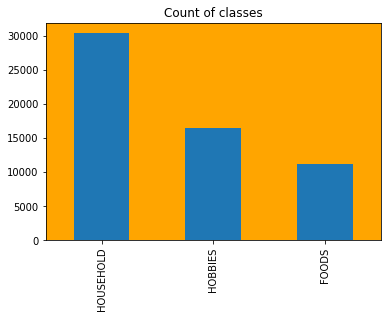

In [40]:
pd.value_counts(train_sales_test['cat_id']).plot(kind = 'bar')
plt.rcParams['axes.facecolor'] = 'blue'
plt.title("Count of classes")

In [41]:
ids = sorted(list(set(df_val['id'])))
d_cols = [c for c in df_val.columns if 'd_' in c]
x_1 = df_val.loc[df_val['id'] == ids[0]].set_index('id')[d_cols].values[0][:90]
x_2 = df_val.loc[df_val['id'] == ids[4]].set_index('id')[d_cols].values[0][1300:1400]
x_3 = df_val.loc[df_val['id'] == ids[65]].set_index('id')[d_cols].values[0][350:450]
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_1)), y=x_1, showlegend=False,
                    mode='lines+markers', name="First sample",
                         marker=dict(color="orange")),
             row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_2)), y=x_2, showlegend=False,
                    mode='lines+markers', name="Second sample",
                         marker=dict(color="red")),
             row=2, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_3)), y=x_3, showlegend=False,
                    mode='lines+markers', name="Third sample",
                         marker=dict(color="violet")),
             row=3, col=1)

fig.update_layout(height=1200, width=800, title_text="Sample sales snippets")
fig.show()

## Giá trung bình luân phiên so với thời gian cho mọi cửa hàng

In [42]:
past_sales = df_val.set_index('id')[d_cols].T.merge(calender.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1').set_index('date')

store_list = sell_prices['store_id'].unique()
means = []
fig = go.Figure()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    means.append(np.mean(past_sales[store_items].sum(axis=1)))
    fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (per store)")

## Doanh số bán hàng trung bình so với tên cửa hàng

In [43]:
df = pd.DataFrame(np.transpose([means, store_list]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Average sales vs. Store name")

## Doanh số bán hàng trung bình luân phiên so với thời gian (California)

In [49]:
greens = ["mediumaquamarine", "orange", "red", "green"]
store_list = sell_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "ca" in s or "CA" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s, marker=dict(color=greens[i])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (California)")

## Doanh số trung bình so với tên cửa hàng (California)

In [45]:
df = pd.DataFrame(np.transpose([means, stores]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name", color_continuous_scale=greens)


fig = go.Figure(data=[
    go.Bar(name='', x=stores, y=means, marker={'color' : greens})])

fig.update_layout(title="Mean sales vs. Store name (California)", yaxis=dict(title="Mean sales"), xaxis=dict(title="Store name"))
fig.update_layout(barmode='group')
fig.show()

## Doanh số bán hàng trung bình luân phiên so với thời gian (Wisconsin)

In [46]:
purples = ["red", "violet", "purple", "indigo"]
store_list = sell_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "wi" in s or "WI" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s, marker=dict(color=purples[i%len(purples)])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (Wisconsin)")

In [ ]:
df = pd.DataFrame(np.transpose([means, stores]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name", color_continuous_scale=greens)


fig = go.Figure(data=[
    go.Bar(name='', x=stores, y=means, marker={'color' : purples})])

fig.update_layout(title="Mean sales vs. Store name (Wisconsin)", yaxis=dict(title="Mean sales"), xaxis=dict(title="Store name"))
fig.update_layout(barmode='group')
fig.show()

## Doanh số trung bình so với tên cửa hàng (Wisconsin)

In [50]:
green = ["orange", "yellow", "seagreen"]
store_list = sell_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "tx" in s or "TX" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s, marker=dict(color=green[i%len(green)])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (Texas)")

## Doanh số bán hàng trung bình luân phiên so với thời gian (Texas)

In [51]:
df = pd.DataFrame(np.transpose([means, stores]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name", color_continuous_scale=greens)


fig = go.Figure(data=[
    go.Bar(name='', x=stores, y=means, marker={'color' : green})])

fig.update_layout(title="Mean sales vs. Store name (Texas)", yaxis=dict(title="Mean sales"), xaxis=dict(title="Store name"))
fig.update_layout(barmode='group')
fig.show()

In [52]:
import gc
del tmp_df
gc.collect()

2337

## Quan sát

In [53]:
train_sales = pd.get_dummies(data=train_sales, columns=['dept_id', 'cat_id', 'store_id', 'state_id'])
train_sales_test = pd.get_dummies(data=train_sales_test, columns=['dept_id', 'cat_id', 'store_id', 'state_id'])

In [54]:
train_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179910 entries, 0 to 179909
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   179910 non-null  object 
 1   item_id              179910 non-null  object 
 2   d                    179910 non-null  object 
 3   qty                  179910 non-null  int64  
 4   date                 179910 non-null  object 
 5   wm_yr_wk             179910 non-null  int64  
 6   snap_CA              179910 non-null  int64  
 7   snap_TX              179910 non-null  int64  
 8   snap_WI              179910 non-null  int64  
 9   is_holiday_1         179910 non-null  int64  
 10  is_holiday_2         179910 non-null  int64  
 11  is_holiday           179910 non-null  int64  
 12  is_weekend           179910 non-null  int64  
 13  sell_price           120060 non-null  float64
 14  dept_id_FOODS_1      179910 non-null  uint8  
 15  dept_id_FOODS_2  

In [55]:
train_sales_test.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_010_CA_1_evaluation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005,HOBBIES_1_006,HOBBIES_1_007,HOBBIES_1_008,HOBBIES_1_009,HOBBIES_1_010
d,d_1942,d_1942,d_1942,d_1942,d_1942,d_1942,d_1942,d_1942,d_1942,d_1942
qty,0,0,0,0,0,0,0,0,0,0
sell_price_x,8.26,3.97,2.97,4.64,2.88,0.96,7.88,0.48,1.77,2.97
date,2016-05-23,2016-05-23,2016-05-23,2016-05-23,2016-05-23,2016-05-23,2016-05-23,2016-05-23,2016-05-23,2016-05-23
wm_yr_wk,11617,11617,11617,11617,11617,11617,11617,11617,11617,11617
snap_CA,0,0,0,0,0,0,0,0,0,0
snap_TX,0,0,0,0,0,0,0,0,0,0
snap_WI,0,0,0,0,0,0,0,0,0,0


In [56]:
train_sales_test =train_sales_test.drop(['sell_price_x', 'snap_CA', 'snap_TX', 'snap_WI'], axis='columns')
train_sales_test = train_sales_test.rename(columns={'sell_price_y': 'sell_price'})
train_sales = train_sales.drop(['snap_CA', 'snap_TX', 'snap_WI'], axis='columns')      

In [57]:
train_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179910 entries, 0 to 179909
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   179910 non-null  object 
 1   item_id              179910 non-null  object 
 2   d                    179910 non-null  object 
 3   qty                  179910 non-null  int64  
 4   date                 179910 non-null  object 
 5   wm_yr_wk             179910 non-null  int64  
 6   is_holiday_1         179910 non-null  int64  
 7   is_holiday_2         179910 non-null  int64  
 8   is_holiday           179910 non-null  int64  
 9   is_weekend           179910 non-null  int64  
 10  sell_price           120060 non-null  float64
 11  dept_id_FOODS_1      179910 non-null  uint8  
 12  dept_id_FOODS_2      179910 non-null  uint8  
 13  dept_id_HOBBIES_1    179910 non-null  uint8  
 14  dept_id_HOBBIES_2    179910 non-null  uint8  
 15  dept_id_HOUSEHOLD

In [58]:
train_sales_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57971 entries, 0 to 57970
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   57971 non-null  object 
 1   item_id              57971 non-null  object 
 2   d                    57971 non-null  object 
 3   qty                  57971 non-null  int64  
 4   date                 57971 non-null  object 
 5   wm_yr_wk             57971 non-null  int64  
 6   is_holiday_1         57971 non-null  int64  
 7   is_holiday_2         57971 non-null  int64  
 8   is_holiday           57971 non-null  int64  
 9   is_weekend           57971 non-null  int64  
 10  sell_price           38686 non-null  float64
 11  dept_id_FOODS_1      57971 non-null  uint8  
 12  dept_id_FOODS_2      57971 non-null  uint8  
 13  dept_id_HOBBIES_1    57971 non-null  uint8  
 14  dept_id_HOBBIES_2    57971 non-null  uint8  
 15  dept_id_HOUSEHOLD_1  57971 non-null 

# Model Training

In [59]:
from sklearn.model_selection import train_test_split


target_col = 'qty'


exclude_cols = ['id', 'item_id', 'd', 'date', 'wm_yr_wk']


feature_cols = [col for col in train_sales.columns if col not in exclude_cols]


y = np.array(train_sales[target_col])
X = np.array(train_sales[feature_cols])

X_train, X_test, y_train, y_test = \
 train_test_split(X, y, test_size=0.3, random_state=1234)


# X_train1, X_train2, y_train1, y_train2 = \
#  train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

## LightGBM

In [60]:
import lightgbm as lgb


lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

params = {
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'objective': 'regression',
    'n_jobs': -1,
    'seed': 236,
    'learning_rate': 0.01,
    'bagging_fraction': 0.75,
    'bagging_freq': 10, 
    'colsample_bytree': 0.75}

model = lgb.train(params, lgb_train, num_boost_round=2500, early_stopping_rounds=50, valid_sets = [lgb_train, lgb_eval], verbose_eval=100)

Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 1.10304	valid_1's rmse: 1.06982
[200]	training's rmse: 0.539416	valid_1's rmse: 0.516643
[300]	training's rmse: 0.302867	valid_1's rmse: 0.280049
[400]	training's rmse: 0.215555	valid_1's rmse: 0.189161
[500]	training's rmse: 0.181031	valid_1's rmse: 0.152148
[600]	training's rmse: 0.166991	valid_1's rmse: 0.137814
[700]	training's rmse: 0.161051	valid_1's rmse: 0.131877
[800]	training's rmse: 0.156998	valid_1's rmse: 0.129488
[900]	training's rmse: 0.155233	valid_1's rmse: 0.127648
[1000]	training's rmse: 0.153966	valid_1's rmse: 0.126596
Early stopping, best iteration is:
[980]	training's rmse: 0.154228	valid_1's rmse: 0.126469


## Quan sát kết quả LightGBM 

In [61]:
pred = model.predict(train_sales_test[feature_cols])
len(pred)

57971

In [62]:
train_sales_test['pred_qty'] = pred
train_sales_test

,id,item_id,d,qty,date,wm_yr_wk,is_holiday_1,is_holiday_2,is_holiday,is_weekend,...,dept_id_HOBBIES_1,dept_id_HOBBIES_2,dept_id_HOUSEHOLD_1,dept_id_HOUSEHOLD_2,cat_id_FOODS,cat_id_HOBBIES,cat_id_HOUSEHOLD,store_id_CA_1,state_id_CA,pred_qty
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,d_1942,0,2016-05-23,11617,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0.004502
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,d_1942,0,2016-05-23,11617,0,0,0,0,...,1,0,0,0,0,1,0,1,1,-0.007213
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,d_1942,0,2016-05-23,11617,0,0,0,0,...,1,0,0,0,0,1,0,1,1,-0.000246
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,d_1942,0,2016-05-23,11617,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0.001476
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,d_1942,0,2016-05-23,11617,0,0,0,0,...,1,0,0,0,0,1,0,1,1,-0.000998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57966,FOODS_2_168_CA_1_evaluation,FOODS_2_168,d_1943,0,2016-05-24,11617,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0.001182
57967,FOODS_2_169_CA_1_evaluation,FOODS_2_169,d_1943,0,2016-05-24,11617,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0.001182
57968,FOODS_2_170_CA_1_evaluation,FOODS_2_170,d_1943,0,2016-05-24,11617,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0.001182
57969,FOODS_2_171_CA_1_evaluation,FOODS_2_171,d_1943,0,2016-05-24,11617,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0.001182


In [68]:
predictions = train_sales_test[['id', 'date', 'pred_qty']]
#predictions = pd.pivot(predictions, index = 'id', columns = 'date', values = 'pred_qty').reset_index()
predictions

,id,date,pred_qty
0,HOBBIES_1_001_CA_1_evaluation,2016-05-23,0.004502
1,HOBBIES_1_002_CA_1_evaluation,2016-05-23,-0.007213
2,HOBBIES_1_003_CA_1_evaluation,2016-05-23,-0.000246
3,HOBBIES_1_004_CA_1_evaluation,2016-05-23,0.001476
4,HOBBIES_1_005_CA_1_evaluation,2016-05-23,-0.000998
...,...,...,...
57966,FOODS_2_168_CA_1_evaluation,2016-05-24,0.001182
57967,FOODS_2_169_CA_1_evaluation,2016-05-24,0.001182
57968,FOODS_2_170_CA_1_evaluation,2016-05-24,0.001182
57969,FOODS_2_171_CA_1_evaluation,2016-05-24,0.001182


In [69]:
# Let's describe Predictions
predictions.describe()

,pred_qty
count,57971.000000
mean,0.003957
std,0.021069
min,-0.102206
25%,-0.001346
50%,0.000348
75%,0.004497
max,0.395921


In [70]:
predictions = predictions.drop(predictions.columns[1], axis=1)
predictions

,id,pred_qty
0,HOBBIES_1_001_CA_1_evaluation,0.004502
1,HOBBIES_1_002_CA_1_evaluation,-0.007213
2,HOBBIES_1_003_CA_1_evaluation,-0.000246
3,HOBBIES_1_004_CA_1_evaluation,0.001476
4,HOBBIES_1_005_CA_1_evaluation,-0.000998
...,...,...
57966,FOODS_2_168_CA_1_evaluation,0.001182
57967,FOODS_2_169_CA_1_evaluation,0.001182
57968,FOODS_2_170_CA_1_evaluation,0.001182
57969,FOODS_2_171_CA_1_evaluation,0.001182


In [72]:
#predictions.columns = ['id'] + ['F' + str(i + 1) for i in range(28)]
predictions

,id,pred_qty
0,HOBBIES_1_001_CA_1_evaluation,0.004502
1,HOBBIES_1_002_CA_1_evaluation,-0.007213
2,HOBBIES_1_003_CA_1_evaluation,-0.000246
3,HOBBIES_1_004_CA_1_evaluation,0.001476
4,HOBBIES_1_005_CA_1_evaluation,-0.000998
...,...,...
57966,FOODS_2_168_CA_1_evaluation,0.001182
57967,FOODS_2_169_CA_1_evaluation,0.001182
57968,FOODS_2_170_CA_1_evaluation,0.001182
57969,FOODS_2_171_CA_1_evaluation,0.001182


## LSTM model Training

In [ ]:
#Feature Scaling
#Scale the features using min-max scaler in range 0-1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dt_scaled = sc.fit_transform(train_sales.drop(['id', 'item_id', 'd', 'date', 'wm_yr_wk'],axis=1))

In [ ]:
timesteps = 14
startDay = 350
X_train = []
y_train = []
for i in range(timesteps, 1941 - startDay):
    X_train.append(dt_scaled[i-timesteps:i])
    y_train.append(dt_scaled[i][0:30490]) 
    #İmportant!! if extra features are added (like oneDayBeforeEvent) 
    #use only sales values for predictions (we only predict sales) 
    #this is why 0:30490 columns are choosen

In [ ]:
del dt_scaled

In [ ]:
#Convert to np array to be able to feed the LSTM model
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1577, 14, 20)
(1577, 20)


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
layer_1_units=50
regressor.add(LSTM(units = layer_1_units, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
layer_3_units=400
regressor.add(LSTM(units = layer_3_units, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
layer_3_units=400
regressor.add(LSTM(units = layer_3_units))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 29))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
epoch_no=32
batch_size_RNN=44